<a href="https://colab.research.google.com/github/Gudiya2005/Twitter-Sentiment-Analyzer/blob/main/Twitter_Sentiment_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets (1).csv


In [41]:
import pandas as pd

#Load the dataset
df = pd.read_csv('Tweets.csv')

#View first 5 rows
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [42]:
print("Shape of dataset:",df.shape)

Shape of dataset: (14640, 15)


In [43]:
print("Column names:\n", df.columns)

Column names:
 Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [44]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [45]:

# Keeping only the relevant columns: text (feature) and airline_sentiment (target)
df = df[['text','airline_sentiment']].copy()
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


/tmp/ipython-input-46-3973430458.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airline_sentiment', palette='Set2')


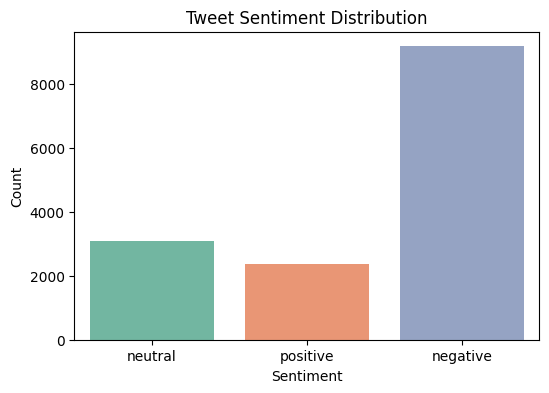

In [46]:
#Class Distribution:To check how many tweets are positive, negative, or neutral
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='airline_sentiment', palette='Set2')
plt.title("Tweet Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-47-1818278016.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='airline_sentiment', y='text_length', data=df, palette='Set3')


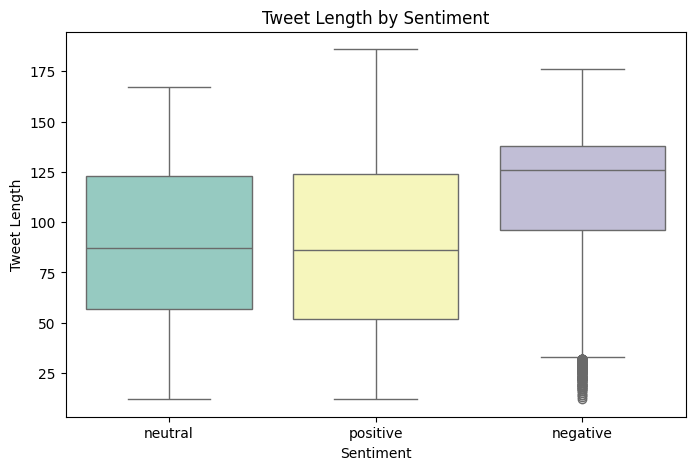

In [47]:
#Analyze tweet length variation across different sentiment classes

# Add a new column that stores the length of each tweet
df['text_length'] = df['text'].apply(len)

# Visualize tweet length using boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='airline_sentiment', y='text_length', data=df, palette='Set3')
plt.title("Tweet Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length")
plt.show()

In [48]:
#Print the top 10 most common words used in each sentiment category

from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')  # Needed for tokenization

# Define a function to get top N frequent words
def get_top_n_words(texts, n=10):
    all_words = ' '.join(texts).lower()
    words = word_tokenize(all_words)
    words = [word for word in words if word.isalpha()]
    return Counter(words).most_common(n)

# Loop through each sentiment and print top words
for sentiment in df['airline_sentiment'].unique():
    print(f"\nTop words for sentiment: {sentiment}")
    top_words = get_top_n_words(df[df['airline_sentiment'] == sentiment]['text'])
    print(top_words)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Top words for sentiment: neutral
[('to', 1664), ('i', 1380), ('the', 973), ('a', 784), ('you', 766), ('jetblue', 748), ('united', 736), ('southwestair', 669), ('on', 664), ('for', 615)]

Top words for sentiment: positive
[('the', 972), ('to', 938), ('you', 911), ('i', 749), ('for', 670), ('thanks', 609), ('jetblue', 594), ('southwestair', 576), ('united', 528), ('a', 520)]

Top words for sentiment: negative
[('to', 6043), ('i', 4548), ('the', 4108), ('a', 3167), ('flight', 2924), ('united', 2894), ('and', 2821), ('on', 2768), ('for', 2712), ('you', 2712)]


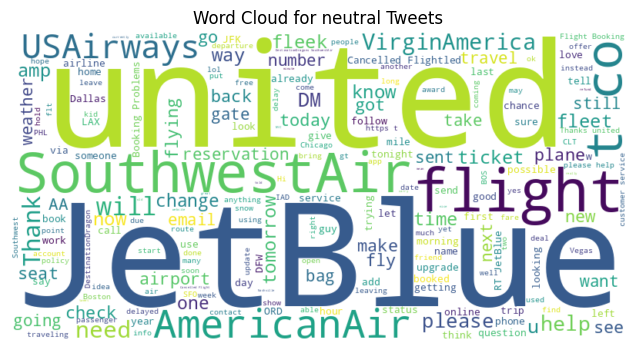

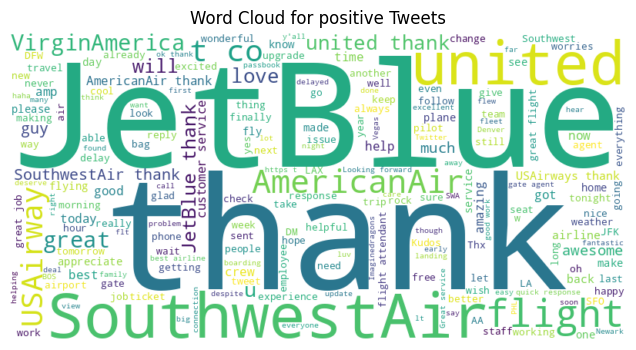

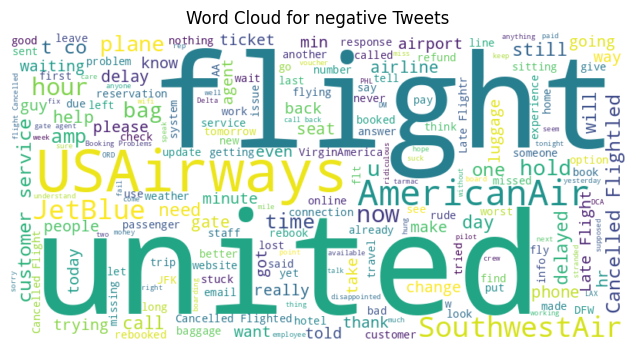

In [49]:
# Generate a word cloud for each sentiment class to visualize common keywords

from wordcloud import WordCloud

for sentiment in df['airline_sentiment'].unique():
    text = ' '.join(df[df['airline_sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()


In [50]:
#Text Preprocessing
import re

#Define cleaning fucntion
def clean_text(text):
  text = re.sub(r'@\w+', '', text)                      # Remove @mentions
  text = re.sub(r'http\S+|www.\S+', '', text)           # Remove URLs
  text = re.sub(r'[^A-Za-z\s]', '',text)                # Remove special characters/numbers
  text = text.lower()                                   # Convert to lowercase
  text = re.sub(r'\s+', ' ', text).strip()              # Remove extra spaces
  return text

#Apply cleaning to the text column
df['clean_text'] = df['text'].apply(clean_text)

#View cleaned tweets
df[['text', 'clean_text']].head()

,text,clean_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [51]:
#Setup for Tokenization and Stemming
import nltk

#Import the list of stopwords like the,is,in
from nltk.corpus import stopwords

#Import the PorterStemmer for reducing words to their root form eg. running-run
from nltk.stem import PorterStemmer

#Download the list of stopwords(needed for filtering out unimportant words)
nltk.download('stopwords')

#Download Punkt tokenizer models(needed for splitting text into individual words or sentences)
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
# Import tokenizer to split text into words
from nltk.tokenize import word_tokenize

# Load English stopwords and create a stemmer
stop_words = set(stopwords.words('english'))   # Set of common stopwords like 'the','is', etc.
stemmer = PorterStemmer()                      # Create an instance of the Porter Stemmer

# Define a function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)  # Split text into words
    # Remove stopwords and apply stemming
    filtered = [stemmer.stem(w) for w in words if w.lower() not in stop_words and w.isalpha()]
    # Join the cleaned, stemmed words back into a string
    return " ".join(filtered)

# Apply the preprocessing function to the 'clean_text' column
df['processed_text'] = df['clean_text'].apply(preprocess_text)


In [53]:
from sklearn.preprocessing import LabelEncoder

#Encode the sentiment labels to numeric form
le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])

In [54]:
#Train-test split
from sklearn.model_selection import train_test_split

#Split the dataset into training and testing sets
X = df['processed_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
#TF-IDF Vectorization - Convert the processed training and testing text into numerical vectors using TF-IDF.

from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

#Fit on training and transform both sets
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [56]:
#Model Training & Evaluation: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')

#Train the model on the training data
model.fit(X_train_vectorized, y_train)

#Predictions on the test set
y_pred_logreg = model.predict(X_test_vectorized)

#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

Accuracy: 0.7503415300546448

Confusion Matrix:
 [[1447  295   93]
 [ 126  430   64]
 [  55   98  320]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1835
           1       0.52      0.69      0.60       620
           2       0.67      0.68      0.67       473

    accuracy                           0.75      2928
   macro avg       0.69      0.72      0.70      2928
weighted avg       0.78      0.75      0.76      2928



In [57]:
#Linear SVM with GridSearchCV - Use GridSearchCV to tune the regularization parameter 'C' of a Linear Support Vector Classifier.

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Define hyperparameter grid
#Tuning only the regularization parameter C
param_grid = {
    'C': [0.01, 0.1, 1, 10]  # Lower C = more regularization, Higher C = less regularization
}

#Initialize LinearSVC
linear_svc = LinearSVC(class_weight='balanced', max_iter=1000)

#Setup GridSearchCV
grid = GridSearchCV(
    estimator=linear_svc,              # Model to tune
    param_grid=param_grid,             # Hyperparameters to search (e.g., C values)
    scoring='f1_weighted',             # Use weighted F1 score for evaluation
    cv=3,                              # Splits training data into 3 parts to validate each configuration
    verbose=2,                         # Show progress during training
    n_jobs=-1                          # Use all CPU cores for faster search
)

#Fit the grid search model on training data
grid.fit(X_train_vectorized, y_train)

#Print the best parameters found
print("Best Parameters:", grid.best_params_)

#Get the best model and use it for predictions
best_model = grid.best_estimator_
y_pred_svm = best_model.predict(X_test_vectorized)

#Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'C': 0.1}

Accuracy: 0.7995218579234973

Confusion Matrix:
 [[1625  152   58]
 [ 171  395   54]
 [  79   73  321]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1835
           1       0.64      0.64      0.64       620
           2       0.74      0.68      0.71       473

    accuracy                           0.80      2928
   macro avg       0.75      0.73      0.74      2928
weighted avg       0.80      0.80      0.80      2928



In [58]:
#Final Model comparison
from sklearn.metrics import f1_score
models = ['Logistic Regression','Linear SVM']
accuracies = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_svm)]
f1_scores = [f1_score(y_test, y_pred_logreg, average='weighted'), f1_score(y_test, y_pred_svm, average='weighted')]

Comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Weighted F1 Score': f1_scores
})

print(Comparison_df)


                 Model  Accuracy  Weighted F1 Score
0  Logistic Regression  0.750342           0.758762
1           Linear SVM  0.799522           0.798378


In [59]:
# ✅ Final Model Selection: Linear SVM
# After training both Logistic Regression and Linear SVM,
# we compared their performance using Accuracy and Weighted F1-Score.
# Since Linear SVM gave better results (higher accuracy and better F1-Score),
# we chose it as our final model.

# Linear SVM works well for high-dimensional sparse data like text,
# and with class_weight='balanced', it handles class imbalance effectively.

# Final Accuracy: ~80%
# Final Weighted F1 Score: ~0.79
# This makes the model suitable for real-world tweet sentiment classification.

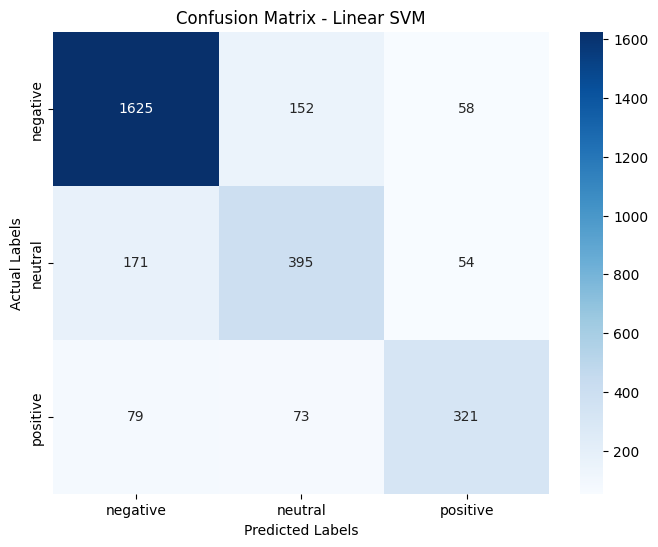

In [60]:
#Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix using actual and predicted labels from the SVM model
cm = confusion_matrix(y_test, y_pred_svm)

#Define sentiment labels
labels = ['negative', 'neutral', 'positive']

#Set the figure size
plt.figure(figsize=(8,6))

#Create a heatmap from the confusion matrix with annotation
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

#Add axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Linear SVM')

#Display the plot
plt.show()

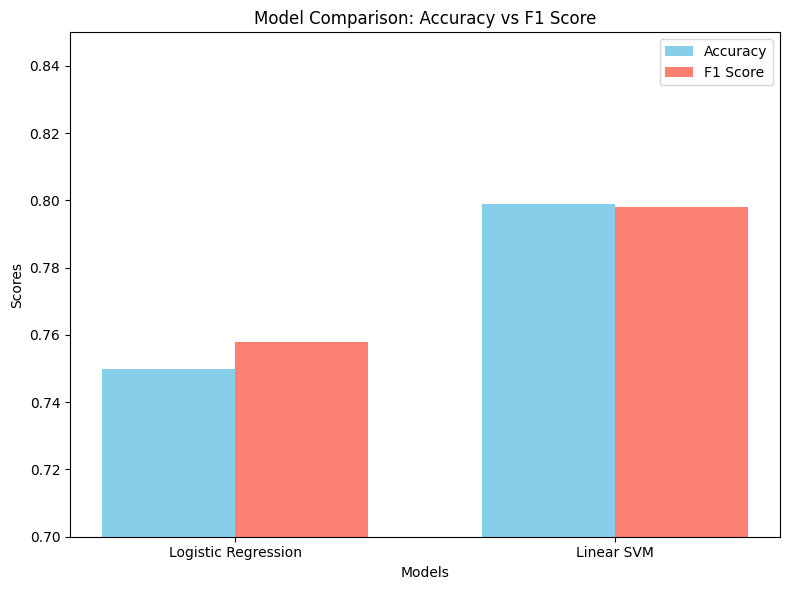

In [61]:
#Bar Plot
import matplotlib.pyplot as plt
import numpy as np

#Model names and their corresponding scores
models = ['Logistic Regression', 'Linear SVM']
accuracies = [0.750, 0.799]
f1_scores = [0.758, 0.798]

#Create positions for bars
x = np.arange(len(models))
bar_width = 0.35

#Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(x, accuracies, width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score', color='salmon')

#Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Accuracy vs F1 Score')
plt.xticks(x + bar_width / 2, models)
plt.ylim(0.7, 0.85)
plt.legend()
plt.tight_layout()

#Show the plot
plt.show()

In [62]:
import joblib
joblib.dump(best_model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [63]:
!pip install gradio

In [68]:
import joblib

#Load the trained model and vectorizer
model = joblib.load("sentiment_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [69]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

#Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

#Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

#Define a function to clean and preprocess
def preprocess(text):
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'http\S+|www.\S+', '', text)
  text = re.sub(r'[^A-Za-z\s]', '', text)
  text = text.lower()
  text = re.sub(r'\s+', ' ', text).strip()
  words = word_tokenize(text)
  filtered = [stemmer.stem(w) for w in  words if w not in stop_words and w.isalpha()]
  return " ".join(filtered)

  #Function to predict sentiment and return output
  def predict_sentiment(text):
    cleaned = preprocess(text)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)[0]

    if prediction == 0:
      return "😠 Negative"
    elif prediction == 1:
      return "😐Neutral"
    else:
      return "😊Positive"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
# Function to predict sentiment from raw tweet

def predict_sentiment(text):
    cleaned = clean_text(text)
    processed = preprocess_text(cleaned)
    vectorized = vectorizer.transform([processed])
    pred = best_model.predict(vectorized)[0]

    #Convert numeric label back to string
    label = le.inverse_transform([pred])[0]

    #Add emoji
    emoji = {'positive': '😊', 'neutral': '😐', 'negative': '😠'}
    return f"{label.capitalize()} {emoji.get(label, '')}"


In [71]:
import gradio as gr

#Define the Gradio UI
interface = gr.Interface(
    fn=predict_sentiment,            #Function that runs on submit
    inputs=gr.Textbox(
        lines=3,
        placeholder="Enter a tweet to analyse sentiment...",
        label="Tweet",
    ),
    outputs=gr.Textbox(label="Predicted Sentiment 😊😐😠"),
    title="Twitter Sentiment Analyzer",
    description="Enter a tweet and find out if it's Positive, Neutral, or Negative.🚀",
    theme=gr.themes.Default()
)

#Launch the interface
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://523384285608fb43a9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [72]:
import joblib

# Save the best model (LinearSVC) and vectorizer
joblib.dump(best_model, "sentiment_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [73]:
from google.colab import files

# Download both files
files.download("sentiment_model.pkl")
files.download("vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
# In this project, we built a machine learning model to classify tweet sentiments as positive, negative, or neutral using NLP techniques.
# After comparing Logistic Regression and Linear SVM, we found Linear SVM performed better based on accuracy and F1-score.

# This model helps in analyzing public opinion on Twitter effectively.